## classification

In [1]:
from datasets import load_dataset

pokemon_dataset = load_dataset("keremberke/pokemon-classification", "full")

/home/voorhs/.pyenv/versions/.sirius-lectures/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pokemon_dataset

DatasetDict({
    train: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 4869
    })
    validation: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 1390
    })
    test: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 732
    })
})

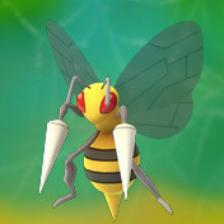

In [3]:
img = pokemon_dataset["train"][300]["image"]
img

In [4]:
from transformers import pipeline

img_clf_pipeline = pipeline(task="image-classification", model="stevanojs/pokemon_classification")

Device set to use cuda:0


In [5]:
img_clf_pipeline(img)

[{'label': 'Beedrill', 'score': 0.9966261386871338},
 {'label': 'Electabuzz', 'score': 0.6475741267204285},
 {'label': 'Pinsir', 'score': 0.6391554474830627},
 {'label': 'Farfetchd', 'score': 0.6377938389778137},
 {'label': 'Flareon', 'score': 0.6299159526824951}]

#### 571 ####
[{'label': 'Squirtle', 'score': 0.9976029992103577},
 {'label': 'Wartortle', 'score': 0.8723291158676147},
 {'label': 'Cubone', 'score': 0.665715754032135},
 {'label': 'Nidorina', 'score': 0.6267998218536377},
 {'label': 'Blastoise', 'score': 0.619769275188446}]


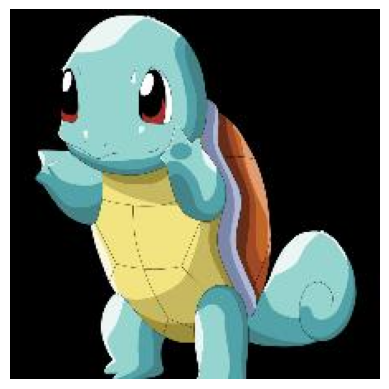

#### 654 ####
[{'label': 'Staryu', 'score': 0.997329831123352},
 {'label': 'Starmie', 'score': 0.859411895275116},
 {'label': 'Jolteon', 'score': 0.7406260967254639},
 {'label': 'Zapdos', 'score': 0.7348490953445435},
 {'label': 'Pikachu', 'score': 0.7043949961662292}]


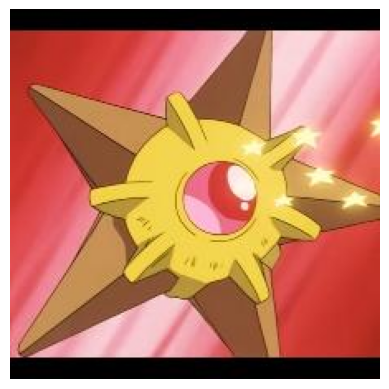

#### 155 ####
[{'label': 'Scyther', 'score': 0.9976745247840881},
 {'label': 'Metapod', 'score': 0.8412181735038757},
 {'label': 'Golbat', 'score': 0.6922124624252319},
 {'label': 'Aerodactyl', 'score': 0.6744895577430725},
 {'label': 'Bulbasaur', 'score': 0.6641728281974792}]


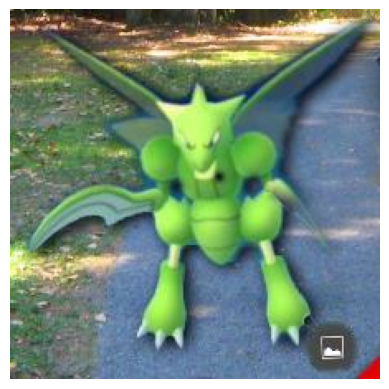

In [6]:
import random
import matplotlib.pyplot as plt
from pprint import pprint

dataset_size = len(pokemon_dataset["test"])
for i in random.sample(range(dataset_size), k=3):
    print(f"#### {i} ####")
    img = pokemon_dataset["test"][i]["image"]
    pprint(img_clf_pipeline(img))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [7]:
from transformers import AutoModelForImageClassification

model = AutoModelForImageClassification.from_pretrained(
    "stevanojs/pokemon_classification",
).cuda()

In [8]:
dataset_names = pokemon_dataset["train"].features["labels"].names
dataset_names[:10]

['Porygon',
 'Goldeen',
 'Hitmonlee',
 'Hitmonchan',
 'Gloom',
 'Aerodactyl',
 'Mankey',
 'Seadra',
 'Gengar',
 'Venonat']

In [9]:
model_names = model.config.id2label
model_names

{0: 'Golbat',
 1: 'Machoke',
 10: 'Raichu',
 100: 'Dragonite',
 101: 'Fearow',
 102: 'Slowpoke',
 103: 'Weezing',
 104: 'Beedrill',
 105: 'Weedle',
 106: 'Cloyster',
 107: 'Vaporeon',
 108: 'Gyarados',
 109: 'Golduck',
 11: 'Zapdos',
 110: 'Machamp',
 111: 'Hitmonlee',
 112: 'Primeape',
 113: 'Cubone',
 114: 'Sandslash',
 115: 'Scyther',
 116: 'Haunter',
 117: 'Metapod',
 118: 'Tentacruel',
 119: 'Aerodactyl',
 12: 'Raticate',
 120: 'Kabutops',
 121: 'Ninetales',
 122: 'Zubat',
 123: 'Rhydon',
 124: 'Mew',
 125: 'Pinsir',
 126: 'Ditto',
 127: 'Victreebel',
 128: 'Omanyte',
 129: 'Horsea',
 13: 'Magnemite',
 130: 'Pikachu',
 131: 'Blastoise',
 132: 'Venomoth',
 133: 'Charizard',
 134: 'Seadra',
 135: 'Muk',
 136: 'Spearow',
 137: 'Bulbasaur',
 138: 'Bellsprout',
 139: 'Electrode',
 14: 'Ivysaur',
 140: 'Gloom',
 141: 'Poliwhirl',
 142: 'Flareon',
 143: 'Seaking',
 144: 'Hypno',
 145: 'Wartortle',
 146: 'Mankey',
 147: 'Tentacool',
 148: 'Exeggcute',
 149: 'Meowth',
 15: 'Growlithe',
 16

In [10]:
sample = pokemon_dataset["test"][2]

127 Alakazam


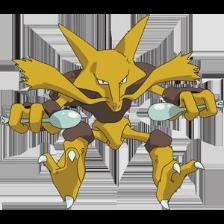

In [11]:
img = sample["image"]
label = sample["labels"]
print(label, dataset_names[label])
img

In [12]:
from transformers import AutoImageProcessor

processor = AutoImageProcessor.from_pretrained("stevanojs/pokemon_classification")
img_as_tensor = processor(images=img, return_tensors="pt")["pixel_values"].cuda()

In [13]:
predicted_logits = model(img_as_tensor)["logits"][0]
predicted_logits.shape, predicted_logits[:10]

(torch.Size([150]),
 tensor([-0.5151, -0.5048, -0.4906, -0.3780,  0.0480, -0.0125,  0.2502, -0.1061,
         -0.1714,  0.1511], device='cuda:0', grad_fn=<SliceBackward0>))

In [14]:
predicted_class = predicted_logits.argmax().item()
predicted_class

99

In [15]:
model_names[predicted_class]

'Alakazam'

## Segmentation